## SMP: Scalable Max-P Regionalization

**Author:** Hussah Alrashid 

The `max-p regions` problem aims at aggregating a set of geographical areas into a maximum number of spatially contiguous and homogeneous regions that satisfy a user-defined constraint. SMP is an effecint algorithm to solve the max-p regions problem at scale.  
An instance of max-p regions problem is given as follows: 
Partition 1000 census tract areas into a maximum number of regions p such that the areas within the same region have a similar household income and each region has at a total population value of least 10k.

In [1]:
import jpype
import geopandas
import libpysal
import sys
#sys.path.append("..")
#from pyneapple.regionalization import scalable_maxp
import pyneapple.regionalization.scalable_maxp as scalable_maxp

## Max-p regions instance based on Mexican states

To solve the max-p regions problem using SMP, we will use the data of regional incomes for Mexican states between the years 1940-2000. We first obtain the data from `libpysal` and then show the different attributes in the dataset and visualize the dataset.



,POLY_ID,AREA,CODE,NAME,PERIMETER,ACRES,HECTARES,PCGDP1940,PCGDP1950,PCGDP1960,...,GR9000,LPCGDP40,LPCGDP50,LPCGDP60,LPCGDP70,LPCGDP80,LPCGDP90,LPCGDP00,TEST,geometry
0,1,7.252751e+10,MX02,Baja California Norte,2040312.385,1.792187e+07,7252751.376,22361.0,20977.0,17865.0,...,0.05,4.35,4.32,4.25,4.40,4.47,4.43,4.48,1.0,"MULTIPOLYGON (((-113.13972 29.01778, -113.2405..."
1,2,7.225988e+10,MX03,Baja California Sur,2912880.772,1.785573e+07,7225987.769,9573.0,16013.0,16707.0,...,0.00,3.98,4.20,4.22,4.39,4.46,4.41,4.42,2.0,"MULTIPOLYGON (((-111.20612 25.80278, -111.2302..."
2,3,2.731957e+10,MX18,Nayarit,1034770.341,6.750785e+06,2731956.859,4836.0,7515.0,7621.0,...,-0.05,3.68,3.88,3.88,4.04,4.13,4.11,4.06,3.0,"MULTIPOLYGON (((-106.62108 21.56531, -106.6475..."
3,4,7.961008e+10,MX14,Jalisco,2324727.436,1.967200e+07,7961008.285,5309.0,8232.0,9953.0,...,0.03,3.73,3.92,4.00,4.21,4.32,4.30,4.33,4.0,"POLYGON ((-101.52490 21.85664, -101.58830 21.7..."
4,5,5.467030e+09,MX01,Aguascalientes,313895.530,1.350927e+06,546702.985,10384.0,6234.0,8714.0,...,0.13,4.02,3.79,3.94,4.21,4.32,4.32,4.44,5.0,"POLYGON ((-101.84620 22.01176, -101.96530 21.8..."


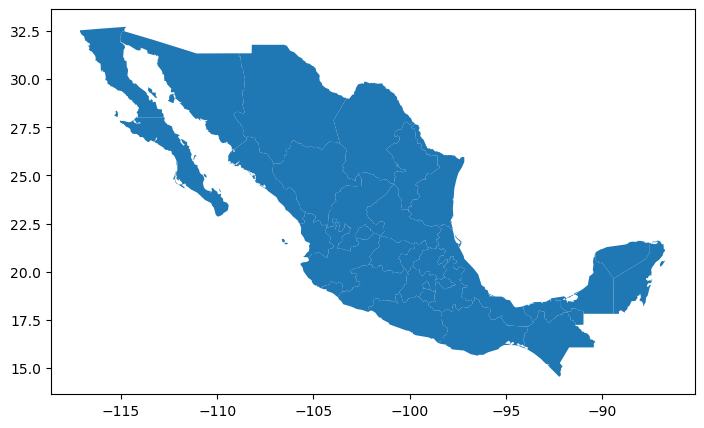

In [2]:
mexico = geopandas.read_file(libpysal.examples.get_path("mexicojoin.shp"))
mexico.plot(figsize = (10,5))
pth = libpysal.examples.get_path("mexicojoin.shp")
mexico = geopandas.read_file(pth)
mexico.head()

In this example, we define the spatial extensive attribute over the `HECTARES` column and set the threshold value to 20 million. We also define the similarity attritute over the `PCGDP1940` column. SMP will output the maximum number of regions p where the sum of the `HECTARES` for all the areas in each region is greater than or equal to the threshold value (i.e. 20 million) and the region areas are be similar in terms of the `PCGDP1940` value.  

In [5]:
mexico = geopandas.read_file(libpysal.examples.get_path("mexicojoin.shp"))
w = libpysal.weights.Rook.from_dataframe(mexico)
results = scalable_maxp.scalable_maxp(mexico, w, 'PCGDP1940', 'HECTARES', 20000000)
# region_IDs is a list containing the region ID for each area [region ID for area 0, region ID for area 1,...]
region_IDs = results[0] 
max_p = results[1]

print(region_IDs)
print(max_p)


[6, 6, 3, 3, 2, 3, 3, 3, 4, 4, 4, 3, 3, 5, 5, 3, 5, 4, 4, 4, 5, 5, 6, 1, 1, 3, 2, 2, 2, 1, 1, 1]
6


Then, we visualize the regionalization results by assigning different colors to different regions

<AxesSubplot:>

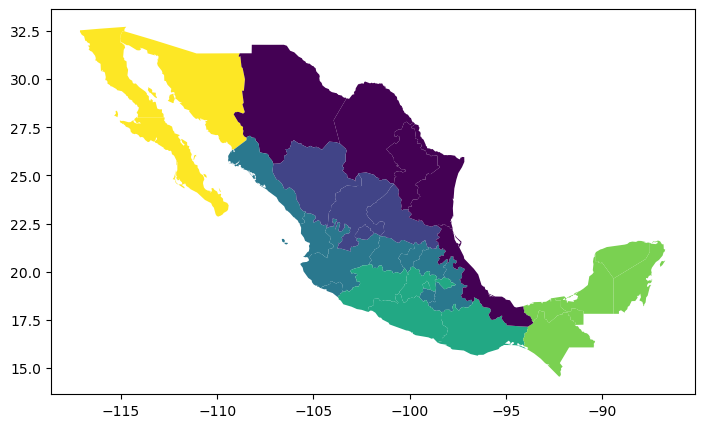

In [6]:
mexico['region'] = region_IDs
mexico.plot(figsize = (10,5) , column = 'region')